# **Valorisation des entreprises**

Dans ce travail nous allons se baser sur la dataset `Data_Infront` contenant les informations financières de plusieurs entreprises, pour développer un modèle de clustering pour les structurer en groupe, Les entreprises presentes dans chaque groupe s'appellent des comparables. 

### **Importation des packages**

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import  LabelEncoder
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

### **Importation de la base de données**

In [7]:
#Importation de la data 'Data_Infront.xlsx'
data = pd.read_excel('infront_data/Data_Infront.xlsx')

In [8]:
#Taille initiale des données
print ('Taille de data : ', data.shape)

Taille de data :  (2620, 147)


In [9]:
data.head()

,isActive,Ticker,Country,Company Name,Sector,Company Description,Market Cap - Last,P/E - Last,P/E (e) - NTM,P/E (e) - 2023,...,EV/EBITDA (e) - 2024.1,EV/EBITDA (e) - 2025.1,P/E (e) - 2021,EV/EBIT (e) - 2022,EV/EBIT (e) - 2023,EV/EBIT (e) - 2024,EV/EBIT (e) - 2025,EV/Net Sales (e) - 2025.1,Net Debt / Mkt. Cap (x) - 2021,Net Debt / Mkt. Cap (x) - 2022
0,1.0,ISPH,EGY,Ibnsina Pharma,Pharmaceuticals,S&P Business Summary\nIbnsina Pharma operates ...,47.545207,4.74,6.670818,6.685,...,7.898604,7.902187,6.180658,13.315307,11.398181,8.682164,NaN,0.254366,1.85,NaN
1,1.0,NaN,MAR,Sothema,Pharmaceuticals,S&P Business Summary\nSociete de Therapeutique...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN
2,1.0,PHAR,EGY,Egyptian International Pharmaceutical Industri...,Pharmaceuticals,S&P Business Summary\nEgyptian International P...,106.224279,6.89,4.726775,4.715288,...,3.276522,2.864017,6.377353,5.897215,4.600035,3.880581,NaN,0.806439,0.35,NaN
3,1.0,UMED,TUN,Unite de Fabrication de Medicaments S.A,Pharmaceuticals,S&P Business Summary\nUnité de Fabrication des...,74.665107,NaN,28.645191,31.217391,...,NaN,NaN,26.397059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,JOR,Dar Al Dawa Development & Investment,Pharmaceuticals,S&P Business Summary\nDar Al Dawa Development ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,NaN


In [10]:
#Le nombre d'entreprise dans data
print (''' Le nombre d'entreprise dans data est : ''', data['Company Name'].value_counts().count())

 Le nombre d'entreprise dans data est :  2106


### **Nettoyage et préparation des données**

#### **Duplicates handling**

In [11]:
# Nombre de lignes duppliquées
print ('Le nombre de lignes duppliquées : ', data.duplicated().sum())

Le nombre de lignes duppliquées :  0


In [12]:
#Suppression des lignes duppliquées
data = data.drop_duplicates()
print ('Nombre de lignes duppliquées aprés supression des lignes duppliquées : ', data.duplicated().sum())

Nombre de lignes duppliquées aprés supression des lignes duppliquées :  0


In [13]:
#Nombre de colonnes duppliquées
print ('le nombre de colonnes duppliquées : ', data.T.duplicated().sum())


le nombre de colonnes duppliquées :  0


In [14]:
#Supression des colonnes duppliquées
data = data.T.drop_duplicates().T
print ('le nombre de colonnes duppliquées aprés suppression des colonnes duppliquées : ', data.T.duplicated().sum())

le nombre de colonnes duppliquées aprés suppression des colonnes duppliquées :  0


In [15]:
print ('Taille de la data après nettoyage des données dupliquées', data.shape)

Taille de la data après nettoyage des données dupliquées (2620, 147)


In [16]:
#data.to_excel('infront_data/Data_Infront.xlsx', index = False)

#### **Null values handling**

In [17]:
#Fonction pourcentage_valeurs_nulles (data) -----------output-----------> le pourcentage de valeurs nulles dans la data
def pourcentage_valeurs_nulles (df):
    nval = df.shape[0]*df.shape[1]
    nnull = df.isnull().sum().sum()
    return nnull*100 / nval 

In [18]:
#Le nombre de valeurs nulles dans 'data' 
print ( pourcentage_valeurs_nulles(data), '%  de valeurs de <data> sont des valeurs nulles')

68.76148932855585 %  de valeurs de <data> sont des valeurs nulles


Text(0.5, 1.0, '% de valeurs nulles par colonne')

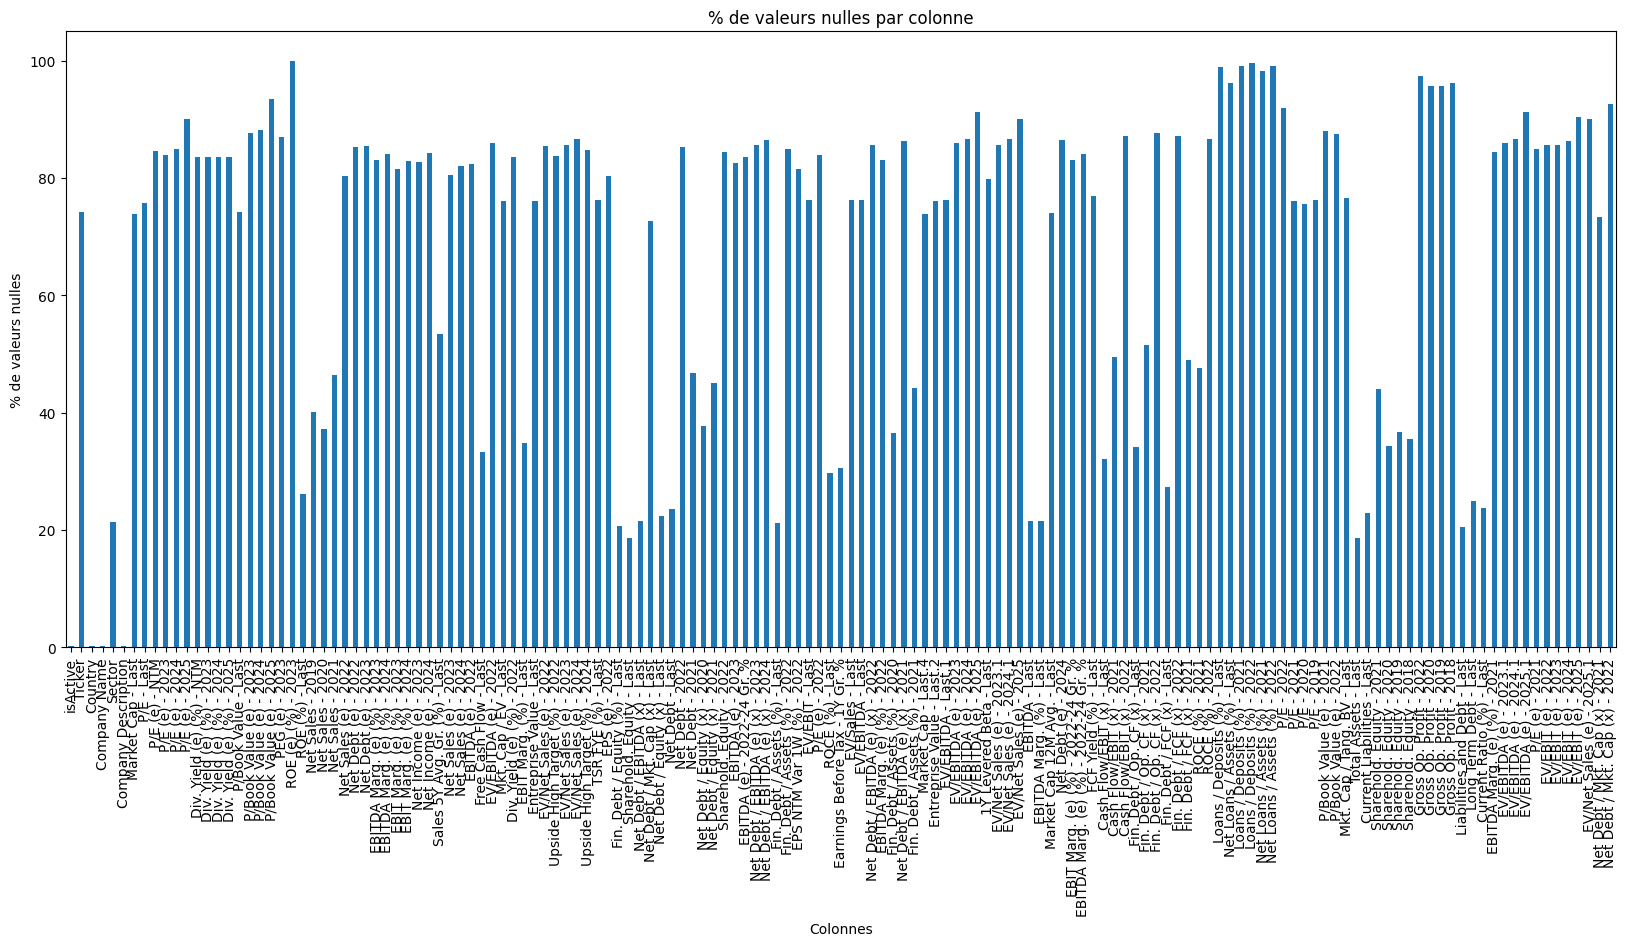

In [19]:
#Pour détecter les colonnes à supprimer:
#Visualisation le pourcentage de valeurs nulles colonnes par colonnes
pourcentage_na_colonne = data.isnull().sum() * 100 / data.shape[0]
fig0, ax = plt.subplots()
pourcentage_na_colonne.plot(kind = 'bar', figsize = (20,8))
plt.xlabel('Colonnes')
plt.ylabel('% de valeurs nulles')
plt.title('% de valeurs nulles par colonne')

In [20]:
#fig0.savefig('Pourcenage de valeurs nulles par colonne.png')

In [21]:
#Colonnes contenant plus de 40% de valeurs nulles
colonnes_contenant_na_a_supprimer = pourcentage_na_colonne[pourcentage_na_colonne >= 30].index
data_V1 = data.drop(colonnes_contenant_na_a_supprimer, axis = 1)
print ('''Le nombre de colonnes qu'on a supprimer est : ''', len (colonnes_contenant_na_a_supprimer))
print ('Le nouveau nombre de colonne dans la data_V1 :', data_V1.shape[1])

Le nombre de colonnes qu'on a supprimer est :  126
Le nouveau nombre de colonne dans la data_V1 : 21


<AxesSubplot: >

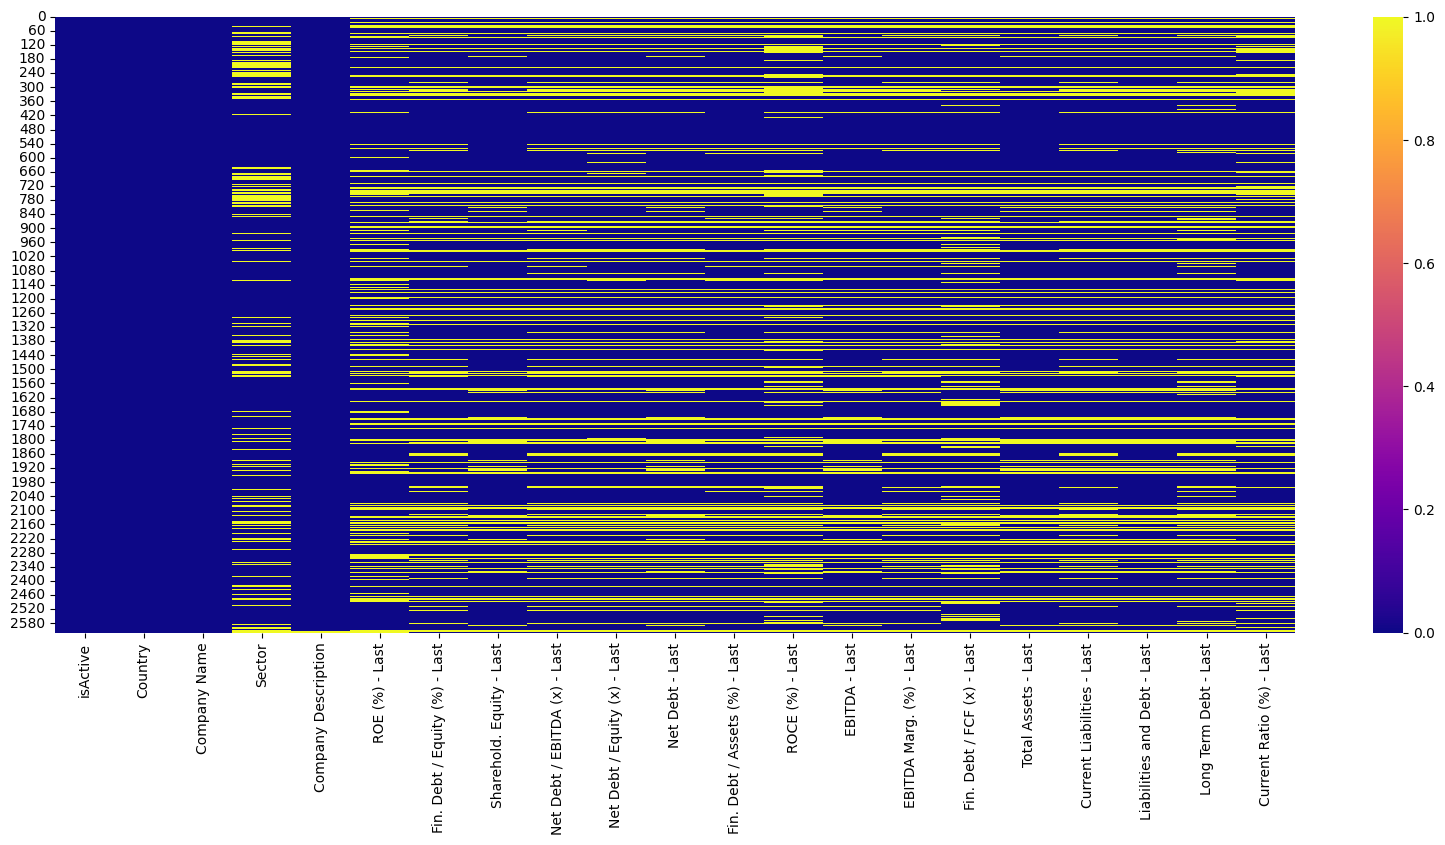

In [22]:
#Visualisation du heatmap des valeurs nulles
fig1 = plt.subplots (figsize = (20,8))
sns.heatmap( data_V1.isnull(), cmap = 'plasma')

In [23]:
#Les valeurs nulles par lignes 
#Pour détecter les lignes à supprimer:
#Visualisation du pourcentage de valeurs nulles ligne par ligne
pourcentage_na_ligne =  data_V1.T.isnull().sum()*100 / data_V1.shape[1]

In [24]:
#Visualisation du nombre de lignes contenant % valeurs nulles en fonction du % de valeurs nulles.
#Liste contenant le nombre de lignes
nbr = []
for pourcentage in range(100):
    nombre_de_lignes = pourcentage_na_ligne[pourcentage_na_ligne >= pourcentage].count()
    nbr.append(nombre_de_lignes)

In [25]:
#La visualisation
fig2 = px.line (x = [i for i in range(100)] , y=nbr)
fig2.update_layout( title = 'Visualisation du nombre de lignes contenant % valeurs nulles en fonction du % de valeurs nulles.',
                   xaxis_title = 'pourcentage de valeurs nulles',
                   yaxis_title = 'Nombre de ligne contenant ce pourcenatage')
fig2.show()

Donc le meilleur seuil à choisir est 39%, donc nous allons supprimer tout les lignes contenant plus de 39% de valeurs nulles

In [26]:
#Suppression des lignes contenant plus de 39% de valeurs nulles
lignes_contenant_na_a_supprimer  = pourcentage_na_ligne[pourcentage_na_ligne >= 39 ].index
data_V2 = data_V1.drop(lignes_contenant_na_a_supprimer, axis =0)
data_V2.shape 


(2062, 21)

In [27]:
#Visualisation du heatmap des valeurs nulles
fig4 = px.imshow(data_V2.isnull(), color_continuous_scale = 'plasma', width = 900, height = 700)
fig4.show()

In [29]:
print ( 'Pourcentage de valeur nulles dans data_V2 :', pourcentage_valeurs_nulles(data_V2))

Pourcentage de valeur nulles dans data_V2 : 3.7919726571520944


In [30]:
data_V3 = data_V2.dropna( axis = 0 )
data_V3.shape

(1297, 21)

In [36]:
data_V3

,isActive,Country,Company Name,Sector,Company Description,ROE (%) - Last,Fin. Debt / Equity (%) - Last,Sharehold. Equity - Last,Net Debt / EBITDA (x) - Last,Net Debt / Equity (x) - Last,...,Fin. Debt / Assets (%) - Last,ROCE (%) - Last,EBITDA - Last,EBITDA Marg. (%) - Last,Fin. Debt / FCF (x) - Last,Total Assets - Last,Current Liabilities - Last,Liabilities and Debt - Last,Long Term Debt - Last,Current Ratio (%) - Last
0,1.0,EGY,Ibnsina Pharma,Pharmaceuticals,S&P Business Summary\nIbnsina Pharma operates ...,22.33,528.57,91.889891,7.99,4.96,...,68.08,8.21,57.061993,4.15,35.59,713.403688,594.352588,621.513797,12.949226,102.94
1,1.0,MAR,Sothema,Pharmaceuticals,S&P Business Summary\nSociete de Therapeutique...,22.64,17.43,138.958635,0.25,0.11,...,10.58,29.68,60.005685,27.09,0,229.047159,76.12973,90.088525,1.286308,183.38
2,1.0,EGY,Egyptian International Pharmaceutical Industri...,Pharmaceuticals,S&P Business Summary\nEgyptian International P...,16.63,59.3,187.98271,1.4,0.49,...,33.44,19.93,65.614268,30.2,0,333.364623,107.392383,145.381913,33.447489,209.69
4,1.0,JOR,Dar Al Dawa Development & Investment,Pharmaceuticals,S&P Business Summary\nDar Al Dawa Development ...,2.83,92.92,59.84322,3.13,0.62,...,39.66,6.97,11.877119,16.24,0,140.225989,72.043785,80.382768,6.161017,110.21
5,1.0,TUN,ADWYA SA,Pharmaceuticals,S&P Business Summary\nSociété ADWYA S.A produc...,3.86,131.21,13.624444,3.68,1.3,...,40.58,7.92,4.81594,14.6,112.62,44.054672,25.540667,30.430228,4.114455,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,1.0,CHN,AN HUI XIN HAI ENVIRONMENTAL,Building Materials & Fixtures,WVB Short Business Summary\nThe Company specia...,-0.48,66.38,7.910093,7.94,0.42,...,32.41,-0.66,0.415488,5.1,0,16.201267,7.679539,8.291174,0.0,136.9
2606,1.0,CHN,AN JIE SUPPLY CHAIN MANAGEMENT,Transportation Services,WVB Short Business Summary\nThe Company is eng...,26.58,29.65,14.780977,0.44,0.14,...,15.53,23.62,4.823076,12.93,36.28,28.220847,11.127318,13.43987,1.309004,149.13
2607,1.0,VNM,AN KHANH - CHI NHANH DONG NAI,Nonferrous Metals,WVB Short Business Summary\nThe company specia...,12.19,N/M-,-1.149578,274.39,-13.83,...,97.28,0.42,0.057935,0.23,0,16.479134,1.597175,17.628712,16.031537,604.99
2612,1.0,PAK,AN TEXTILE MILLS,Clothing & Accessories,WVB Short Business Summary\nOur Company is mai...,10.87,39.89,4.532262,1.97,0.37,...,19.24,8.01,0.853828,6.27,0,9.397219,4.090718,4.864957,0.0,103.34


Les modifications qui nous reste à faire sur la data:
* coding de la colonne Country
* coding de la colonne Sector
* Enlevement  de la colonne Company Name
* Coding de la colonne Company Description

#### **Coding des colonnes**

In [34]:
#Coding de la colonne Country
data_V3.Country.value_counts()

USA    134
IND    132
VNM     96
CHN     72
JPN     62
      ... 
MKD      1
PSE      1
URY      1
MMR      1
BHS      1
Name: Country, Length: 88, dtype: int64

In [44]:
#Les valeurs originales de la colonnes Country
Country = data_V3['Country']
# Encodage de la colonne
data_V3['Country'] = LabelEncoder().fit_transform(  data_V3['Country'] )
#data['colonne_catégorielle'] = le.inverse_transform(data['colonne_encodée']) si vouloir revenir à la colonne d'origine
data_V3.Country

C:\Users\hh\AppData\Local\Temp\ipykernel_6332\625147533.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       22
1       49
2       22
4       40
5       78
        ..
2605    15
2606    15
2607    86
2612    64
2613    86
Name: Country, Length: 1297, dtype: int32

In [51]:
#Codage de la colonne sector
#Stockage de la colonne
Secor = data_V3['Sector']
#Encoding de la colonne
data_V3['Sector'] = LabelEncoder().fit_transform( data_V3['Sector'] ) 
data_V3.Sector

C:\Users\hh\AppData\Local\Temp\ipykernel_6332\2231259171.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       71
1       71
2       71
4       71
5       71
        ..
2605    13
2606    90
2607    67
2612    16
2613    48
Name: Sector, Length: 1297, dtype: int32

In [72]:
#Codage de la colonne Company Description 
#Importation de la fonction vectoriser_coder
from My_function_vectorizer_coder import vectorizer_coder

In [73]:
#Vocabulaire qu'on va utiliser
vocabulaire = pd.read_csv('vocabulaire_Business.T.txt')
Description_coder, Company_Description_Vectoriser = vectorizer_coder(data_V3['Company Description'] , vocabulaire)

Ajoutons n = len(colonne) lignes de valeurs 0 à la dataframe vocabulaire_business


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Entrain d'appliquer le preprocessing à la colonne
Entrain de transformer la colonne à une dataframe pour obtenir une colonne de description vectoriser
Entrain de coder la nouvelle colonne vectoriser vers le vocabulaire
codage de la  0   ème ligne
codage de la  1   ème ligne
codage de la  2   ème ligne
codage de la  3   ème ligne
codage de la  4   ème ligne
codage de la  5   ème ligne
codage de la  6   ème ligne
codage de la  7   ème ligne
codage de la  8   ème ligne
codage de la  9   ème ligne
codage de la  10   ème ligne
codage de la  11   ème ligne
codage de la  12   ème ligne
codage de la  13   ème ligne
codage de la  14   ème ligne
codage de la  15   ème ligne
codage de la  16   ème ligne
codage de la  17   ème ligne
codage de la  18   ème ligne
codage de la  19   ème ligne
codage de la  20   ème ligne
codage de la  21   ème ligne
codage de la  22   ème ligne
codage de la  23   ème ligne
codage de la  24   ème ligne
codage de la  25   ème ligne
codage de la  26   ème ligne
codage d

In [76]:
#Suppression de la colonne Company Description
Company_Description = data_V3['Company Description']
data_V4 = data_V3.drop( columns = 'Company Description', axis = 1 )

In [80]:
#Ajoutons les nouveaux colonne de business description à la data
data_V5 = pd.concat( [data_V4, Description_coder], axis = 1 )
data_V5.head()

,isActive,Country,Company Name,Sector,ROE (%) - Last,Fin. Debt / Equity (%) - Last,Sharehold. Equity - Last,Net Debt / EBITDA (x) - Last,Net Debt / Equity (x) - Last,Net Debt - Last,...,geothermal,forwarding,eye,ecological,core,contracts,collaboration,cities,box,bottles
0,1.0,22.0,Ibnsina Pharma,71.0,22.33,528.57,91.889891,7.99,4.96,456.076982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,49.0,Sothema,71.0,22.64,17.43,138.958635,0.25,0.11,14.725149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,22.0,Egyptian International Pharmaceutical Industri...,71.0,16.63,59.3,187.98271,1.4,0.49,91.777802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,40.0,Dar Al Dawa Development & Investment,71.0,2.83,92.92,59.84322,3.13,0.62,37.210452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,78.0,ADWYA SA,71.0,3.86,131.21,13.624444,3.68,1.3,17.698616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#Importation de la data
#data_V5.to_excel( 'data_infront_VF.xlsx', index = False )

In [92]:
data_V6 = pd.read_excel( 'data_infront_VF.xlsx' )

In [99]:
#Les  colonnes principales
columns = data_V6.columns[:20]

In [93]:
data_V7 = data_V6.dropna( axis = 0 )
data_V7.shape

(510, 1022)

In [105]:
#data_V7.to_excel( 'data_infront_VF.xlsx', index = False )

#### **Clustering sur data_V7**

In [84]:
X = data_V4.drop(columns = 'Company Name', axis =1)
X.head()

,isActive,Country,Sector,ROE (%) - Last,Fin. Debt / Equity (%) - Last,Sharehold. Equity - Last,Net Debt / EBITDA (x) - Last,Net Debt / Equity (x) - Last,Net Debt - Last,Fin. Debt / Assets (%) - Last,ROCE (%) - Last,EBITDA - Last,EBITDA Marg. (%) - Last,Fin. Debt / FCF (x) - Last,Total Assets - Last,Current Liabilities - Last,Liabilities and Debt - Last,Long Term Debt - Last,Current Ratio (%) - Last
0,1.0,22,71,22.33,528.57,91.889891,7.99,4.96,456.076982,68.08,8.21,57.061993,4.15,35.59,713.403688,594.352588,621.513797,12.949226,102.94
1,1.0,49,71,22.64,17.43,138.958635,0.25,0.11,14.725149,10.58,29.68,60.005685,27.09,0,229.047159,76.12973,90.088525,1.286308,183.38
2,1.0,22,71,16.63,59.3,187.98271,1.4,0.49,91.777802,33.44,19.93,65.614268,30.2,0,333.364623,107.392383,145.381913,33.447489,209.69
4,1.0,40,71,2.83,92.92,59.84322,3.13,0.62,37.210452,39.66,6.97,11.877119,16.24,0,140.225989,72.043785,80.382768,6.161017,110.21
5,1.0,78,71,3.86,131.21,13.624444,3.68,1.3,17.698616,40.58,7.92,4.81594,14.6,112.62,44.054672,25.540667,30.430228,4.114455,110.4


##### KMeans 

In [91]:
#Diagramme d'Elbow
inertia = []
silhouette = []
list = [i for i in range (2,31)]
for n in list:
    model = KMeans( init = 'k-means++', n_clusters = n , n_init = 12 )
    model.fit(X)
    inertia.append (model.inertia_)
    silhouette.silhouette_score( X, model.labels_ ) 

ValueError: could not convert string to float: 'N/M-'

#### **Jointure des deux datatset capital IQ et Infront**

In [74]:
data_infront = data
data_infront.shape

(2620, 147)

In [75]:
data_capital_iq = pd.read_excel('Data/Company Screening Report FINpack.xls')
data_capital_iq.shape

(20425, 122)

In [76]:
columns_infront = data_infront.columns
columns_capital_iq = data_capital_iq.columns

In [97]:
columns_capital_iq = pd.DataFrame (columns_capital_iq, columns = ['columns_capital_iq'])

In [98]:
columns_infront = pd.DataFrame (columns_infront, columns = ['columns_infront'])

In [109]:
columns_capital_infront = pd.concat([columns_capital_iq, columns_infront], axis = 1)
columns_capital_infront

,columns_capital_iq,columns_infront
0,Company Name,isActive
1,Exchange:Ticker,Ticker
2,Business Description,Country
3,Total Debt/Equity % Capital IQ [Latest Annual],Company Name
4,Total Debt/Capital % Capital IQ [CY 2020],Sector
...,...,...
142,NaN,EV/EBIT (e) - 2024
143,NaN,EV/EBIT (e) - 2025
144,NaN,EV/Net Sales (e) - 2025.1
145,NaN,Net Debt / Mkt. Cap (x) - 2021


In [111]:
columns_capital_infront.to_csv('columns_capital_infront.txt')

In [121]:
for company in data_infront['Company Name']:
    if company in data_capital_iq['Company Name']:
        print ( company )


11
1606
11
1606
22
26
32
397
471
532
911


In [126]:
data_infront.loc[178]

isActive                                          True
Ticker                                             NaN
Country                                            NGA
Company Name                                        11
Sector                            Integrated Oil & Gas
                                          ...         
EV/EBIT (e) - 2024                                 NaN
EV/EBIT (e) - 2025                                 NaN
EV/Net Sales (e) - 2025.1                          NaN
Net Debt / Mkt. Cap (x) - 2021                     NaN
Net Debt / Mkt. Cap (x) - 2022                     NaN
Name: 178, Length: 147, dtype: object